In [23]:
import pandas as pd
import talib as ta
import matplotlib.pyplot as plt
import pyupbit as up
import numpy as np
from scipy.stats import pearsonr
import seaborn as sns

In [24]:
df = pd.read_csv('bitcoin_data_visualization.csv')

## 1. 이동평균선

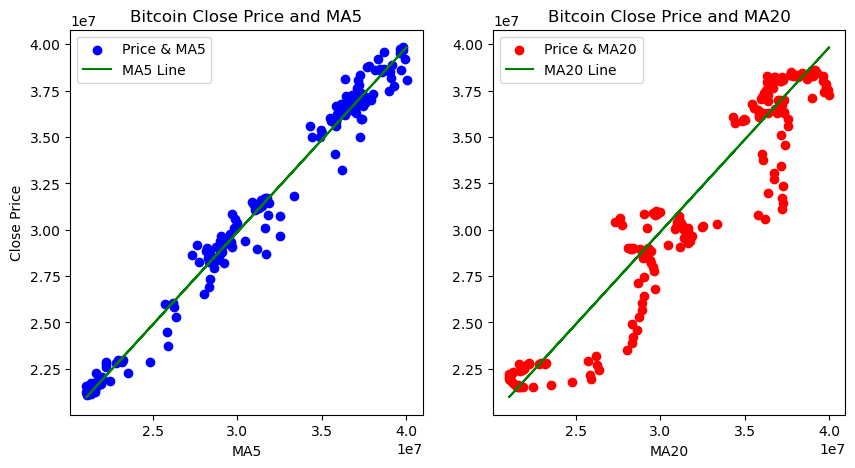

MA5와의 상관계수: 0.9910919408856149
MA20와의 상관계수: 0.9515729029765634


In [6]:
# 이동평균 계산하기
ma_5 = ta.SMA(df['close'], timeperiod=5)  # 5일 이동평균
ma_20 = ta.SMA(df['close'], timeperiod=20)  # 20일 이동평균

# 데이터프레임 만들기
df_ma = pd.DataFrame({'price': df['close'], 'MA5': ma_5, 'MA20': ma_20})

# nan값 제거
df_ma.dropna(inplace=True)

# 상관계수 계산
corr5 = np.corrcoef(df_ma['price'], df_ma['MA5'])[0, 1]
corr20 = np.corrcoef(df_ma['price'], df_ma['MA20'])[0, 1]

# 회귀직선 계산
regression5 = np.polyfit(df_ma['price'], df_ma['MA5'], deg=1)
regression20 = np.polyfit(df_ma['price'], df_ma['MA5'], deg=1)
regression5_line = np.polyval(regression5, df_ma['price'])
regression20_line = np.polyval(regression20, df_ma['price'])

# 차트 설정
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].set_title('Bitcoin Close Price and MA5')
ax[0].set_xlabel('MA5')
ax[0].set_ylabel('Close Price')

ax[1].set_title('Bitcoin Close Price and MA20')
ax[1].set_xlabel('MA20')

# Scatter plot 그리기
ax[0].scatter(df_ma['price'], df_ma['MA5'], color='blue', label='Price & MA5')
ax[1].scatter(df_ma['price'], df_ma['MA20'], color='red', label='Price & MA20')

# 회귀직선 그리기
ax[0].plot(df_ma['price'], regression5_line, color='green', label='MA5 Line')
ax[1].plot(df_ma['price'], regression20_line, color='green', label='MA20 Line')

# 차트 레이블 설정
ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')

# 차트 보여주기
plt.show()

print("MA5와의 상관계수:", corr5)
print("MA20와의 상관계수:", corr20)

## 2. RSI

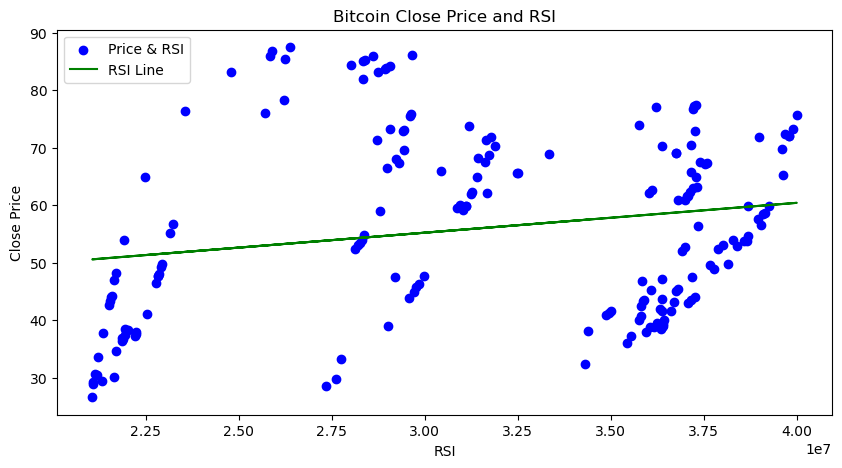

RSI와의 상관계수: 0.1979466595719428


In [7]:
# RSI 계산
rsi = ta.RSI(df['close'], timeperiod=14)

# 데이터프레임 만들기
df_ma = pd.DataFrame({'price': df['close'], 'RSI': rsi})

# nan값 제거
df_ma.dropna(inplace=True)

# 상관계수 계산
corr = np.corrcoef(df_ma['price'], df_ma['RSI'])[0, 1]

# 회귀직선 계산
regression = np.polyfit(df_ma['price'], df_ma['RSI'], deg=1)
regression_line = np.polyval(regression, df_ma['price'])

# 차트 설정
plt.figure(figsize=(10, 5))
plt.title('Bitcoin Close Price and RSI')
plt.xlabel('RSI')
plt.ylabel('Close Price')

# Scatter plot 그리기
plt.scatter(df_ma['price'], df_ma['RSI'], color='blue', label='Price & RSI')

# 회귀직선 그리기
plt.plot(df_ma['price'], regression_line, color='green', label='RSI Line')

# 차트 레이블 설정
plt.legend(loc='upper left')

# 차트 보여주기
plt.show()

print("RSI와의 상관계수:", corr)

## 3. MACD

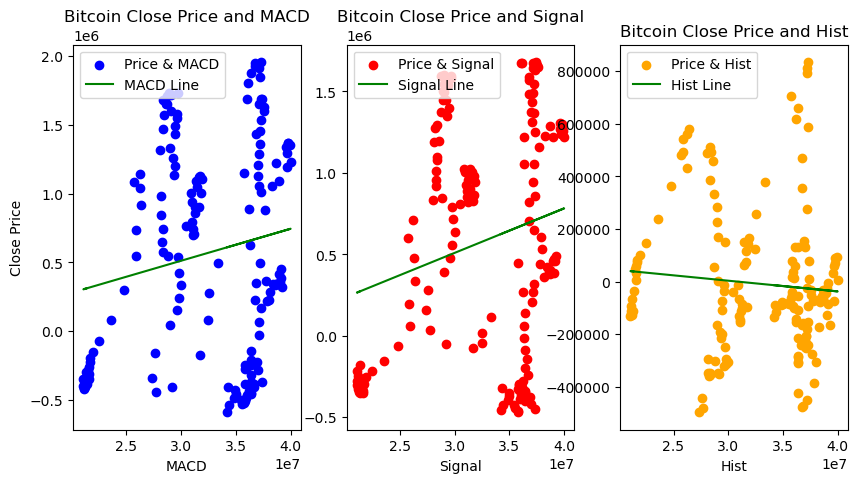

MACD와의 상관계수: 0.16098726559733212
Signal와의 상관계수: 0.20840112148104908
Hist와의 상관계수: -0.08018630528630774


In [25]:
# MACD 계산
macd, signal, hist = ta.MACD(df['close'], fastperiod=12, slowperiod=26, signalperiod=9)

# 데이터프레임 만들기
df_ma = pd.DataFrame({'price': df['close'], 'MACD': macd, 'Signal': signal,
                     'Hist': hist})

# nan값 제거
df_ma.dropna(inplace=True)

# 상관계수 계산
corr_MA = np.corrcoef(df_ma['price'], df_ma['MACD'])[0, 1]
corr_Sig = np.corrcoef(df_ma['price'], df_ma['Signal'])[0, 1]
corr_Hist = np.corrcoef(df_ma['price'], df_ma['Hist'])[0, 1]

# 회귀직선 계산
regression_MA = np.polyfit(df_ma['price'], df_ma['MACD'], deg=1)
regression_Sig = np.polyfit(df_ma['price'], df_ma['Signal'], deg=1)
regression_Hist = np.polyfit(df_ma['price'], df_ma['Hist'], deg=1)
regression_line_MA = np.polyval(regression_MA, df_ma['price'])
regression_line_Sig = np.polyval(regression_Sig, df_ma['price'])
regression_line_Hist = np.polyval(regression_Hist, df_ma['price'])

# 차트 설정
fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].set_title('Bitcoin Close Price and MACD')
ax[0].set_xlabel('MACD')
ax[0].set_ylabel('Close Price')

ax[1].set_title('Bitcoin Close Price and Signal')
ax[1].set_xlabel('Signal')

ax[2].set_title('Bitcoin Close Price and Hist')
ax[2].set_xlabel('Hist')

# Scatter plot 그리기
ax[0].scatter(df_ma['price'], df_ma['MACD'], color='blue', label='Price & MACD')
ax[1].scatter(df_ma['price'], df_ma['Signal'], color='red', label='Price & Signal')
ax[2].scatter(df_ma['price'], df_ma['Hist'], color='orange', label='Price & Hist')

# 회귀직선 그리기
ax[0].plot(df_ma['price'], regression_line_MA, color='green', label='MACD Line')
ax[1].plot(df_ma['price'], regression_line_Sig, color='green', label='Signal Line')
ax[2].plot(df_ma['price'], regression_line_Hist, color='green', label='Hist Line')

# 차트 레이블 설정
ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')
ax[2].legend(loc='upper left')

# 차트 보여주기
plt.show()

print("MACD와의 상관계수:", corr_MA)
print("Signal와의 상관계수:", corr_Sig)
print("Hist와의 상관계수:", corr_Hist)

## 4. 볼린저 밴드

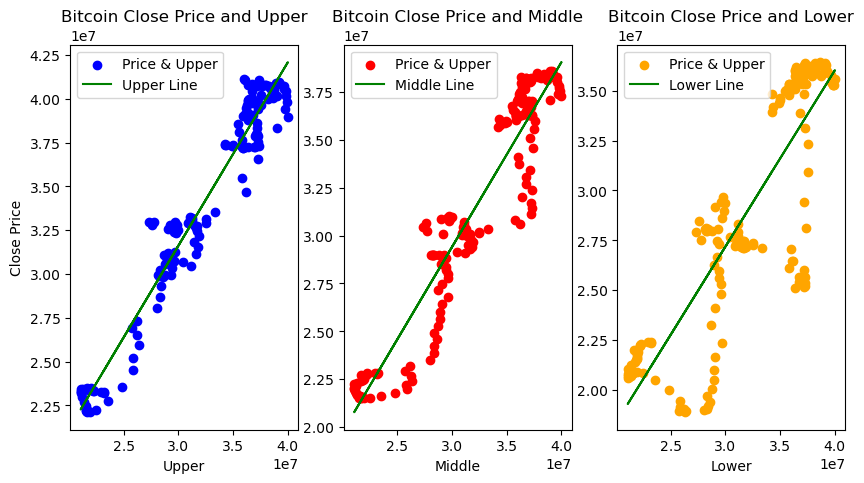

볼린저 밴드(Upper)와의 상관계수: 0.9778302082257929
볼린저 밴드(Middle)와의 상관계수: 0.9507944255349049
볼린저 밴드(Lower)와의 상관계수: 0.856026182843995


In [26]:
# 볼린저 밴드 계산
upper, middle, lower = ta.BBANDS(df['close'], timeperiod=20, nbdevup=2, nbdevdn=2)

# 데이터프레임 만들기
df_ma = pd.DataFrame({'price': df['close'], 'Upper': upper, 'Middle': middle, 
                     'Lower': lower})

# nan값 제거
df_ma.dropna(inplace=True)

# 상관계수 계산
corr_Up = np.corrcoef(df_ma['price'], df_ma['Upper'])[0, 1]
corr_Mid = np.corrcoef(df_ma['price'], df_ma['Middle'])[0, 1]
corr_Low = np.corrcoef(df_ma['price'], df_ma['Lower'])[0, 1]

# 회귀직선 계산
regression_Up = np.polyfit(df_ma['price'], df_ma['Upper'], deg=1)
regression_Mid = np.polyfit(df_ma['price'], df_ma['Middle'], deg=1)
regression_Low = np.polyfit(df_ma['price'], df_ma['Lower'], deg=1)
regression_line_Up = np.polyval(regression_Up, df_ma['price'])
regression_line_Mid = np.polyval(regression_Mid, df_ma['price'])
regression_line_Low = np.polyval(regression_Low, df_ma['price'])

# 차트 설정
fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].set_title('Bitcoin Close Price and Upper')
ax[0].set_xlabel('Upper')
ax[0].set_ylabel('Close Price')

ax[1].set_title('Bitcoin Close Price and Middle')
ax[1].set_xlabel('Middle')

ax[2].set_title('Bitcoin Close Price and Lower')
ax[2].set_xlabel('Lower')

# Scatter plot 그리기
ax[0].scatter(df_ma['price'], df_ma['Upper'], color='blue', label='Price & Upper')
ax[1].scatter(df_ma['price'], df_ma['Middle'], color='red', label='Price & Upper')
ax[2].scatter(df_ma['price'], df_ma['Lower'], color='orange', label='Price & Upper')

# 회귀직선 그리기
ax[0].plot(df_ma['price'], regression_line_Up, color='green', label='Upper Line')
ax[1].plot(df_ma['price'], regression_line_Mid, color='green', label='Middle Line')
ax[2].plot(df_ma['price'], regression_line_Low, color='green', label='Lower Line')

# 차트 레이블 설정
ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')
ax[2].legend(loc='upper left')

# 차트 보여주기
plt.show()

print("볼린저 밴드(Upper)와의 상관계수:", corr_Up)
print("볼린저 밴드(Middle)와의 상관계수:", corr_Mid)
print("볼린저 밴드(Lower)와의 상관계수:", corr_Low)

## 5. 스토캐스틱

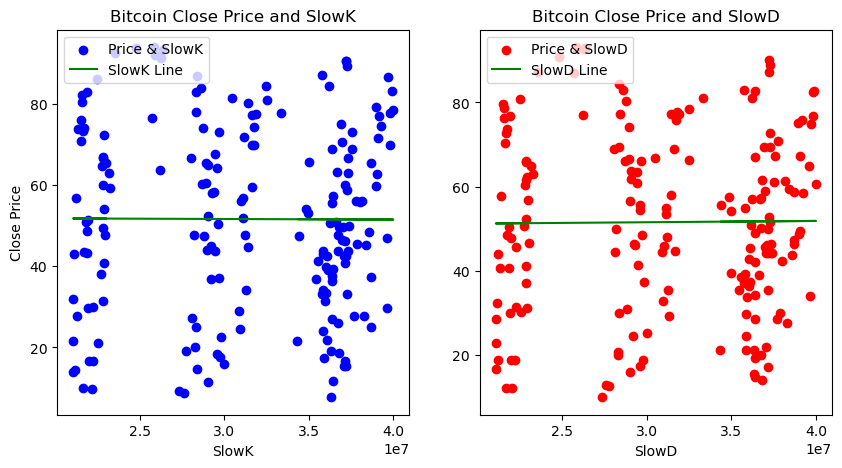

스토캐스틱(SlowK)와의 상관계수: -0.003877711895119853
스토캐스틱(SlowD)와의 상관계수: 0.009037451527275163


In [10]:
# 스토캐스틱 계산
slowk, slowd = ta.STOCH(df['high'], df['low'], df['close'], fastk_period=5, slowk_period=3, slowd_period=3)

# 데이터프레임 만들기
df_ma = pd.DataFrame({'price': df['close'], 'SlowK': slowk, 'SlowD': slowd})

# nan값 제거
df_ma.dropna(inplace=True)

# 상관계수 계산
corr_K = np.corrcoef(df_ma['price'], df_ma['SlowK'])[0, 1]
corr_D = np.corrcoef(df_ma['price'], df_ma['SlowD'])[0, 1]


# 회귀직선 계산
regression_K = np.polyfit(df_ma['price'], df_ma['SlowK'], deg=1)
regression_D = np.polyfit(df_ma['price'], df_ma['SlowD'], deg=1)
regression_line_K = np.polyval(regression_K, df_ma['price'])
regression_line_D = np.polyval(regression_D, df_ma['price'])

# 차트 설정
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].set_title('Bitcoin Close Price and SlowK')
ax[0].set_xlabel('SlowK')
ax[0].set_ylabel('Close Price')

ax[1].set_title('Bitcoin Close Price and SlowD')
ax[1].set_xlabel('SlowD')

# Scatter plot 그리기
ax[0].scatter(df_ma['price'], df_ma['SlowK'], color='blue', label='Price & SlowK')
ax[1].scatter(df_ma['price'], df_ma['SlowD'], color='red', label='Price & SlowD')

# 회귀직선 그리기
ax[0].plot(df_ma['price'], regression_line_K, color='green', label='SlowK Line')
ax[1].plot(df_ma['price'], regression_line_D, color='green', label='SlowD Line')

# 차트 레이블 설정
ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')

# 차트 보여주기
plt.show()

print("스토캐스틱(SlowK)와의 상관계수:", corr_K)
print("스토캐스틱(SlowD)와의 상관계수:", corr_D)

## 6. OBV

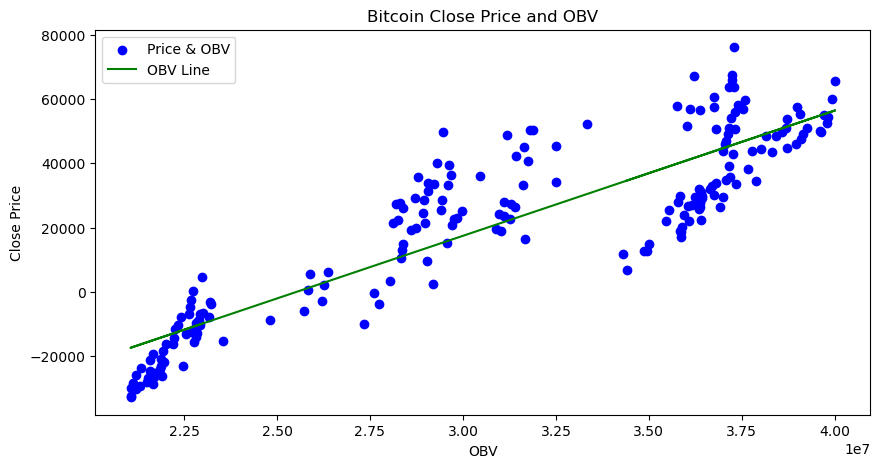

OBV와의 상관계수: 0.8876089620564075


In [11]:
# OBV 계산
obv = ta.OBV(df['close'], df['volume'])

# 데이터프레임 만들기
df_ma = pd.DataFrame({'price': df['close'], 'OBV': obv})

# nan값 제거
df_ma.dropna(inplace=True)

# 상관계수 계산
corr = np.corrcoef(df_ma['price'], df_ma['OBV'])[0, 1]

# 회귀직선 계산
regression = np.polyfit(df_ma['price'], df_ma['OBV'], deg=1)
regression_line = np.polyval(regression, df_ma['price'])

# 차트 설정
plt.figure(figsize=(10, 5))
plt.title('Bitcoin Close Price and OBV')
plt.xlabel('OBV')
plt.ylabel('Close Price')

# Scatter plot 그리기
plt.scatter(df_ma['price'], df_ma['OBV'], color='blue', label='Price & OBV')

# 회귀직선 그리기
plt.plot(df_ma['price'], regression_line, color='green', label='OBV Line')

# 차트 레이블 설정
plt.legend(loc='upper left')

# 차트 보여주기
plt.show()

print("OBV와의 상관계수:", corr)

## 7. ADX

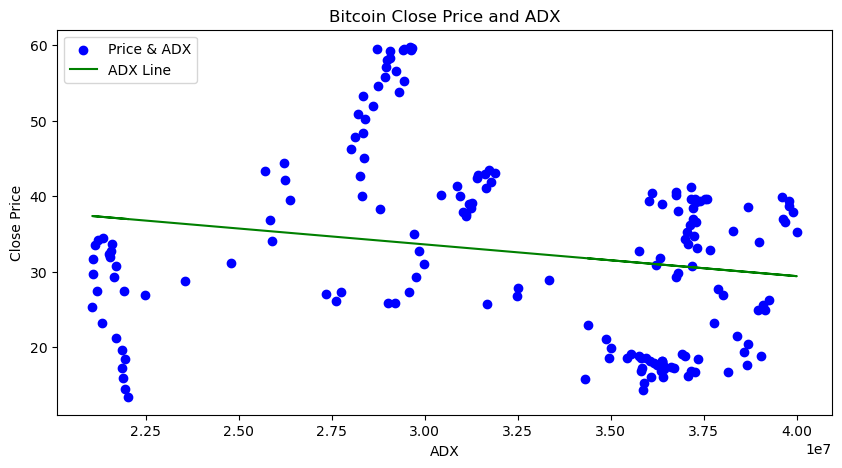

ADX와의 상관계수: -0.19640574607739938


In [12]:
# ADX 계산
adx = ta.ADX(df['high'], df['low'], df['close'])

# 데이터프레임 만들기
df_ma = pd.DataFrame({'price': df['close'], 'ADX': adx})

# nan값 제거
df_ma.dropna(inplace=True)

# 상관계수 계산
corr = np.corrcoef(df_ma['price'], df_ma['ADX'])[0, 1]

# 회귀직선 계산
regression = np.polyfit(df_ma['price'], df_ma['ADX'], deg=1)
regression_line = np.polyval(regression, df_ma['price'])

# 차트 설정
plt.figure(figsize=(10, 5))
plt.title('Bitcoin Close Price and ADX')
plt.xlabel('ADX')
plt.ylabel('Close Price')

# Scatter plot 그리기
plt.scatter(df_ma['price'], df_ma['ADX'], color='blue', label='Price & ADX')

# 회귀직선 그리기
plt.plot(df_ma['price'], regression_line, color='green', label='ADX Line')

# 차트 레이블 설정
plt.legend(loc='upper left')

# 차트 보여주기
plt.show()

print("ADX와의 상관계수:", corr)

## 8. ATR

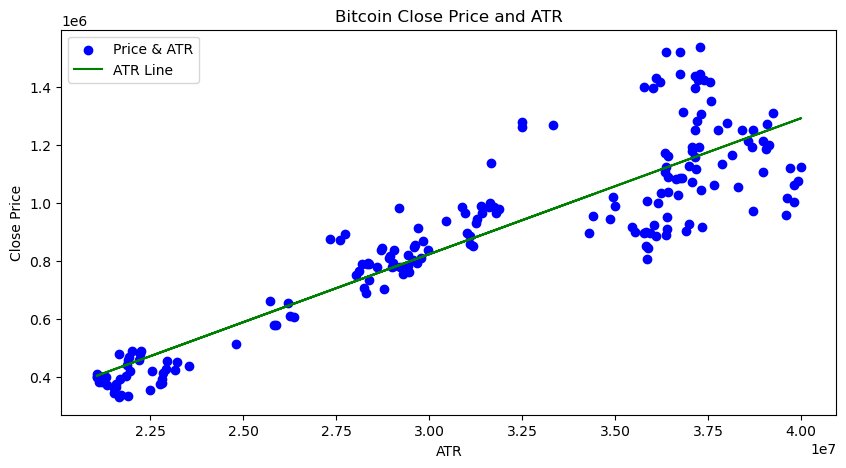

ATR와의 상관계수: 0.8941673940485746


In [13]:
# ATR 계산
atr = ta.ATR(df['high'], df['low'], df['close'])

# 데이터프레임 만들기
df_ma = pd.DataFrame({'price': df['close'], 'ATR': atr})

# nan값 제거
df_ma.dropna(inplace=True)

# 상관계수 계산
corr = np.corrcoef(df_ma['price'], df_ma['ATR'])[0, 1]

# 회귀직선 계산
regression = np.polyfit(df_ma['price'], df_ma['ATR'], deg=1)
regression_line = np.polyval(regression, df_ma['price'])

# 차트 설정
plt.figure(figsize=(10, 5))
plt.title('Bitcoin Close Price and ATR')
plt.xlabel('ATR')
plt.ylabel('Close Price')

# Scatter plot 그리기
plt.scatter(df_ma['price'], df_ma['ATR'], color='blue', label='Price & ATR')

# 회귀직선 그리기
plt.plot(df_ma['price'], regression_line, color='green', label='ATR Line')

# 차트 레이블 설정
plt.legend(loc='upper left')

# 차트 보여주기
plt.show()

print("ATR와의 상관계수:", corr)

## 9. MFI

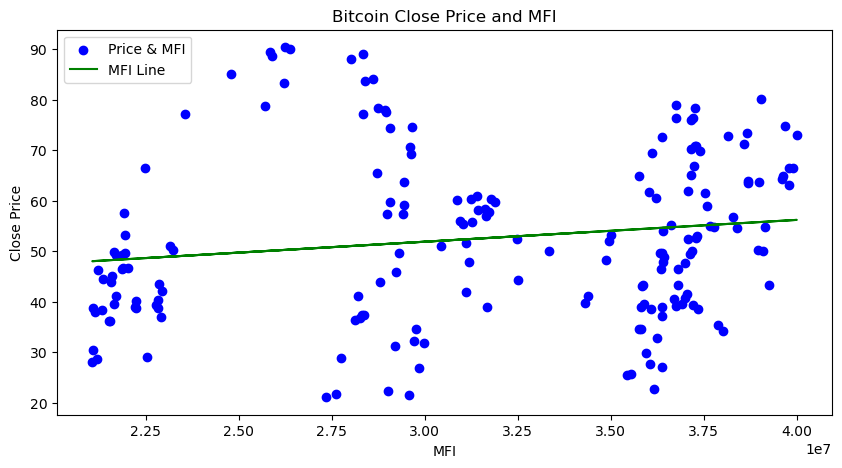

MFI와의 상관계수: 0.15689063191910826


In [15]:
# MFI 계산
mfi = ta.MFI(df['high'], df['low'], df['close'], df['volume'], timeperiod=14)

# 데이터프레임 만들기
df_ma = pd.DataFrame({'price': df['close'], 'MFI': mfi})

# nan값 제거
df_ma.dropna(inplace=True)

# 상관계수 계산
corr = np.corrcoef(df_ma['price'], df_ma['MFI'])[0, 1]

# 회귀직선 계산
regression = np.polyfit(df_ma['price'], df_ma['MFI'], deg=1)
regression_line = np.polyval(regression, df_ma['price'])

# 차트 설정
plt.figure(figsize=(10, 5))
plt.title('Bitcoin Close Price and MFI')
plt.xlabel('MFI')
plt.ylabel('Close Price')

# Scatter plot 그리기
plt.scatter(df_ma['price'], df_ma['MFI'], color='blue', label='Price & MFI')

# 회귀직선 그리기
plt.plot(df_ma['price'], regression_line, color='green', label='MFI Line')

# 차트 레이블 설정
plt.legend(loc='upper left')

# 차트 보여주기
plt.show()

print("MFI와의 상관계수:", corr)

## 10. ROC

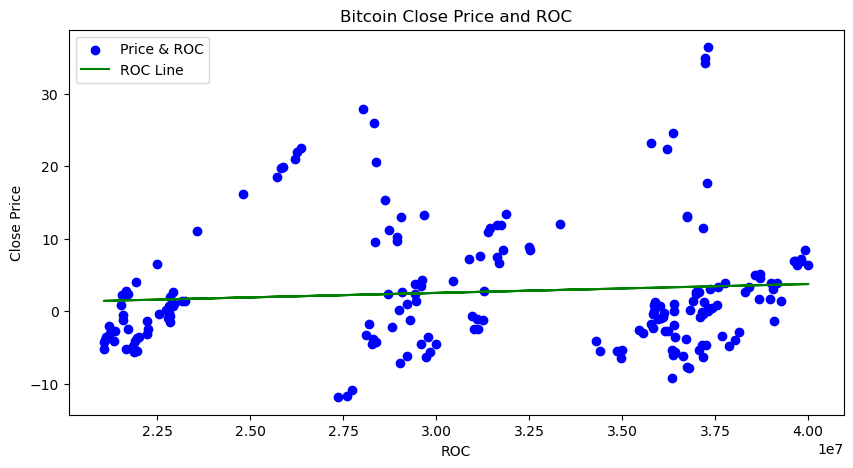

ROC와의 상관계수: 0.08575641568147209


In [16]:
# ROC 계산
roc = ta.ROC(df['close'], timeperiod=10)

# 데이터프레임 만들기
df_ma = pd.DataFrame({'price': df['close'], 'ROC': roc})

# nan값 제거
df_ma.dropna(inplace=True)

# 상관계수 계산
corr = np.corrcoef(df_ma['price'], df_ma['ROC'])[0, 1]

# 회귀직선 계산
regression = np.polyfit(df_ma['price'], df_ma['ROC'], deg=1)
regression_line = np.polyval(regression, df_ma['price'])

# 차트 설정
plt.figure(figsize=(10, 5))
plt.title('Bitcoin Close Price and ROC')
plt.xlabel('ROC')
plt.ylabel('Close Price')

# Scatter plot 그리기
plt.scatter(df_ma['price'], df_ma['ROC'], color='blue', label='Price & ROC')

# 회귀직선 그리기
plt.plot(df_ma['price'], regression_line, color='green', label='ROC Line')

# 차트 레이블 설정
plt.legend(loc='upper left')

# 차트 보여주기
plt.show()

print("ROC와의 상관계수:", corr)

## 11. CCI

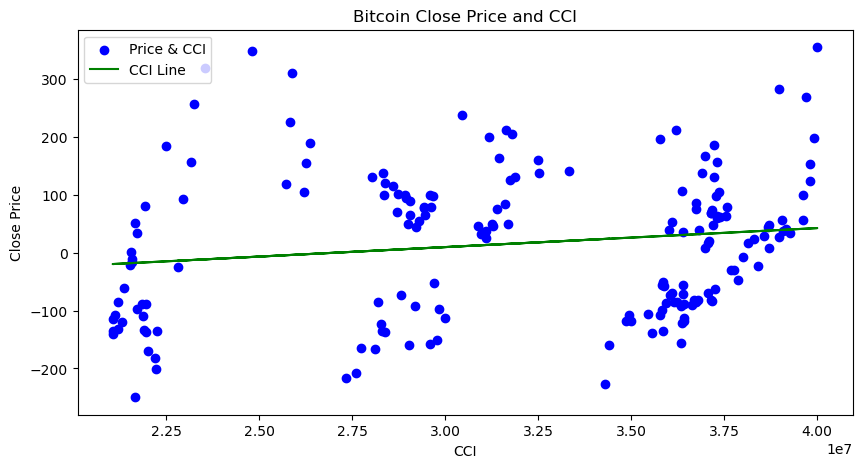

CCI와의 상관계수: 0.1562463666133068


In [17]:
# CCI 계산
cci = ta.CCI(df['high'], df['low'], df['close'], timeperiod=20)

# 데이터프레임 만들기
df_ma = pd.DataFrame({'price': df['close'], 'CCI': cci})

# nan값 제거
df_ma.dropna(inplace=True)

# 상관계수 계산
corr = np.corrcoef(df_ma['price'], df_ma['CCI'])[0, 1]

# 회귀직선 계산
regression = np.polyfit(df_ma['price'], df_ma['CCI'], deg=1)
regression_line = np.polyval(regression, df_ma['price'])

# 차트 설정
plt.figure(figsize=(10, 5))
plt.title('Bitcoin Close Price and CCI')
plt.xlabel('CCI')
plt.ylabel('Close Price')

# Scatter plot 그리기
plt.scatter(df_ma['price'], df_ma['CCI'], color='blue', label='Price & CCI')

# 회귀직선 그리기
plt.plot(df_ma['price'], regression_line, color='green', label='CCI Line')

# 차트 레이블 설정
plt.legend(loc='upper left')

# 차트 보여주기
plt.show()

print("CCI와의 상관계수:", corr)

## 11. DMI

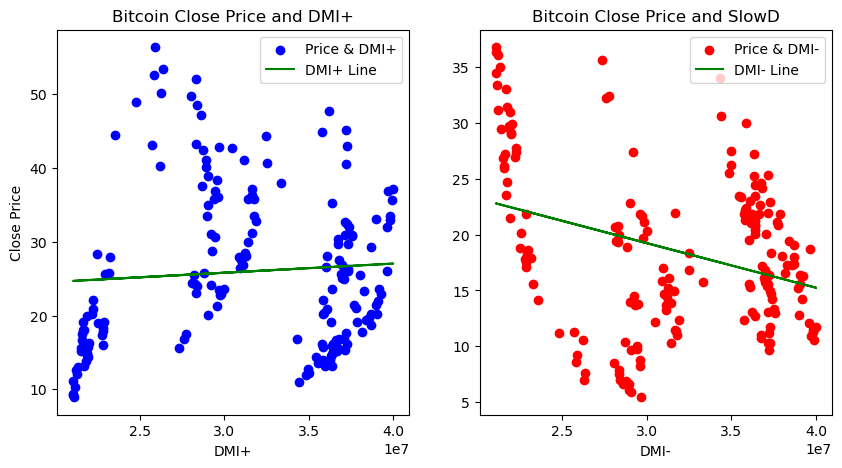

DMI+의 상관계수: 0.0691046167777751
DMI-의 상관계수: -0.32794260034885153


In [18]:
# DMI 계산
dmi_plus = ta.PLUS_DI(df['high'], df['low'], df['close'], timeperiod=14)
dmi_minus = ta.MINUS_DI(df['high'], df['low'], df['close'], timeperiod=14)

# 데이터프레임 만들기
df_ma = pd.DataFrame({'price': df['close'], 'DMI+': dmi_plus, 'DMI-': dmi_minus})

# nan값 제거
df_ma.dropna(inplace=True)

# 상관계수 계산
corr_P = np.corrcoef(df_ma['price'], df_ma['DMI+'])[0, 1]
corr_M = np.corrcoef(df_ma['price'], df_ma['DMI-'])[0, 1]


# 회귀직선 계산
regression_P = np.polyfit(df_ma['price'], df_ma['DMI+'], deg=1)
regression_M = np.polyfit(df_ma['price'], df_ma['DMI-'], deg=1)
regression_line_P= np.polyval(regression_P, df_ma['price'])
regression_line_M= np.polyval(regression_M, df_ma['price'])

# 차트 설정
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].set_title('Bitcoin Close Price and DMI+')
ax[0].set_xlabel('DMI+')
ax[0].set_ylabel('Close Price')

ax[1].set_title('Bitcoin Close Price and SlowD')
ax[1].set_xlabel('DMI-')

# Scatter plot 그리기
ax[0].scatter(df_ma['price'], df_ma['DMI+'], color='blue', label='Price & DMI+')
ax[1].scatter(df_ma['price'], df_ma['DMI-'], color='red', label='Price & DMI-')

# 회귀직선 그리기
ax[0].plot(df_ma['price'], regression_line_P, color='green', label='DMI+ Line')
ax[1].plot(df_ma['price'], regression_line_M, color='green', label='DMI- Line')

# 차트 레이블 설정
ax[0].legend(loc='upper right')
ax[1].legend(loc='upper right')

# 차트 보여주기
plt.show()

print("DMI+의 상관계수:", corr_P)
print("DMI-의 상관계수:", corr_M)

In [21]:
df_data = pd.DataFrame()
df_data['Close'] = df['close']

# 이동평균
df_data['MA5'] = ta.SMA(df['close'], timeperiod=5)
df_data['MA20'] = ta.SMA(df['close'], timeperiod=20)

# RSI
df_data['RSI'] = ta.RSI(df['close'], timeperiod=14)

# MACD
df_data['MACD'], df_data['Siganl'], df_data['Hist'] = ta.MACD(df['close'], fastperiod=12, 
                                                          slowperiod=26, signalperiod=9)

# 볼린저 밴드
df_data['Upper'], df_data['Middle'], df_data['Lower'] = ta.BBANDS(df['close'], timeperiod=20, 
                                                               nbdevup=2, nbdevdn=2)

# 스토캐스틱
df_data['SlowK'], df_data['SlowD'] = ta.STOCH(df['high'], df['low'], df['close'], 
                                              fastk_period=5, slowk_period=3, slowd_period=3)

# OBV
df_data['OBV'] = ta.OBV(df['close'], df['volume'])

# ADX
df_data['ADX'] = ta.ADX(df['high'], df['low'], df['close'])

# ATR
df_data['ATR'] = ta.ATR(df['high'], df['low'], df['close'])

# MFI
df_data['MFI'] = ta.MFI(df['high'], df['low'], df['close'], df['volume'], timeperiod=14)

# ROC
df_data['ROC'] = ta.ROC(df['close'], timeperiod=10)

# CCI
df_data['CCI'] = ta.CCI(df['high'], df['low'], df['close'], timeperiod=20)

# DMI
df_data['DMI+'] = ta.PLUS_DI(df['high'], df['low'], df['close'], timeperiod=14)
df_data['DMI-'] = ta.MINUS_DI(df['high'], df['low'], df['close'], timeperiod=14)

df_data.dropna(inplace=True)

df_data

,Close,MA5,MA20,RSI,MACD,Siganl,Hist,Upper,Middle,Lower,SlowK,SlowD,OBV,ADX,ATR,MFI,ROC,CCI,DMI+,DMI-
33,21702000.0,21852800.0,22382000.0,34.579092,-259783.514882,-178422.894018,-81360.620864,2.339159e+07,22382000.0,2.137241e+07,43.445506,48.575114,-26508.694239,21.180216,3.917526e+05,49.184020,-2.458537,-96.993649,13.226681,31.467632
34,21321000.0,21738800.0,22320850.0,29.492314,-301145.916715,-202967.498557,-98178.418157,2.342729e+07,22320850.0,2.121441e+07,27.737170,40.718303,-29351.218749,23.160106,3.996988e+05,38.368848,-4.089069,-120.479912,12.018914,35.020630
35,21061000.0,21576600.0,22228000.0,26.614992,-350861.235339,-232546.245914,-118314.989425,2.342627e+07,22228000.0,2.102973e+07,13.963519,28.382065,-32502.499510,25.319572,3.987203e+05,28.085780,-5.173345,-140.915784,11.175567,36.780661
36,21201000.0,21426600.0,22145600.0,30.544393,-374645.473745,-260966.091480,-113679.382265,2.338757e+07,22145600.0,2.090363e+07,14.483931,18.728207,-30038.041688,27.457868,3.978832e+05,28.584584,-2.091992,-131.317705,10.388516,36.046535
37,21070000.0,21271000.0,22057550.0,28.980685,-399460.526926,-288664.978569,-110795.548357,2.334165e+07,22057550.0,2.077345e+07,21.632903,16.693451,-32737.113904,29.701352,4.074629e+05,30.406426,-4.275135,-134.919648,9.407671,36.334619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,35852000.0,35598400.0,36060800.0,46.742070,-381524.397789,-331336.795442,-50187.602346,3.730010e+07,36060800.0,3.482150e+07,43.712957,29.767585,17139.792710,17.228020,1.005081e+06,43.042632,0.078160,-135.516177,13.978992,29.959424
196,34952000.0,35371000.0,35996400.0,41.293497,-428362.144051,-350741.865164,-77620.278887,3.732257e+07,35996400.0,3.467023e+07,53.165351,39.444971,12619.737800,18.595309,1.018718e+06,52.011907,-6.420348,-107.708223,12.806730,27.447060
197,34996000.0,35192600.0,35938400.0,41.651593,-456666.792615,-371926.850654,-84739.941960,3.733136e+07,35938400.0,3.454544e+07,65.685422,54.187910,14990.057750,19.864935,9.898098e+05,53.119655,-5.395761,-118.143034,12.239281,26.230918
198,34865000.0,34992600.0,35862400.0,40.852613,-484088.761801,-394359.232884,-89729.528918,3.731422e+07,35862400.0,3.441058e+07,53.968270,57.606348,12654.365047,21.043873,9.447520e+05,48.340143,-5.550740,-118.612981,11.907077,25.518947


<Axes: >

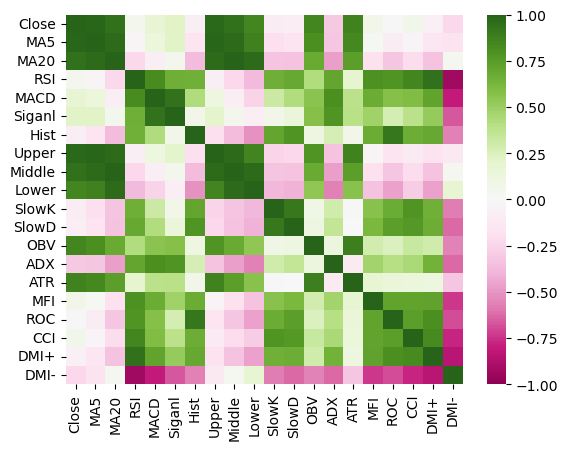

In [22]:
sns.heatmap(df_data.corr(), cmap='PiYG', vmin=-1.0)